## Final Project Submission

Please fill out:
* Student name: **Loyce Tsuma**
* Student pace: self paced / part time / full time: **Full time**
* Scheduled project review date/time: **30/7/2024**
* Instructor name:**Antony Muiko**
* Blog post URL:


# Overview

The goal of this exploratory data analysis is to uncover insights about successful movie genres and trends that can inform the business strategy for a new movie studio.

The analysis should yield actionable recommendations for the types of films to create in order to maximize box office success

# Business Problem


- Identify  which genres (e.g. action, comedy, drama) are currently performing best at the box office so that the  new movie studio can  prioritize

  creating films in these top-performing genres to increase their chances of commercial success.

- Identify emerging  new or growing trends in the movie industry,as recognizing these trends early allows the studio to capitalize on them by

   
  developing films in those popular categories.

- Understand target audience preferences through analyzing audience demographics and their movie-going habits can provide insights into what types of

  films resonate most with different segments so that the  studio can then tailor their film slate to the preferences of their core target audiences

# Exploratory Data Analysis and Cleaning

## The Data Set


The Data was collected from two data sets 

`im.db.zip` a * Zipped SQLite database  and * `bom.movie_gross.csv.gz`


#### Importing the required Libraries


In [32]:
#importing libraries

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import sqlite3
import zipfile
import os

#### Reading the Files

In [33]:
#connecting and loading the sqldatabase 

db_file_path = r'C:\Users\FLEX 5\Documents\PHASETWOPROJECT\dsc-phase-2-project-v3\zippedData\im.db'
conn = sqlite3.connect(db_file_path)

# Create a cursor object
cursor = conn.cursor()

# Execute a query to get the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all results
tables = cursor.fetchall()

print(tables)

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [34]:
#Load the  tables into one  DataFrame

movie_basics_df = pd.read_sql_query("""
                                SELECT *
                                FROM movie_basics mb
                                JOIN movie_ratings mr ON mb.movie_id = mr.movie_id 
                            """, conn)



In [35]:
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119


In [36]:
# load the CSV file into a pandas Dataframe 
bom_df = pd.read_csv('bom.movie_gross.csv')

bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [37]:
# merging  the data Frames for easy analysis
df = pd.merge(movie_basics_df,bom_df, left_on= 'primary_title', right_on= 'title',how = 'inner')
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",tt0315642,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",tt0337692,6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",tt0359950,7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",tt0365907,6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610,7.0,539338,Jurassic World,Uni.,652300000.0,"1,019.40",2015


In [38]:
copied_df = df.copy()# to keep duplicate of original data before EDA

#### Exploratory Data Analysis 

##### Understanding the Data Structure

In [39]:
#general data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3025 non-null   object 
 1   primary_title    3025 non-null   object 
 2   original_title   3025 non-null   object 
 3   start_year       3025 non-null   int64  
 4   runtime_minutes  2978 non-null   float64
 5   genres           3018 non-null   object 
 6   movie_id         3025 non-null   object 
 7   averagerating    3025 non-null   float64
 8   numvotes         3025 non-null   int64  
 9   title            3025 non-null   object 
 10  studio           3022 non-null   object 
 11  domestic_gross   3003 non-null   float64
 12  foreign_gross    1831 non-null   object 
 13  year             3025 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 331.0+ KB


In [40]:
# Noting that the (numerical)foreign_gross,runtime_minutes,domestic_gross columns has about 1194,47,22 respectively missing values indicated as NAN and replacing this with the median value

#Replace NAN to numeric values

df['foreign_gross'] = pd.to_numeric(df['foreign_gross'],errors = 'coerce')

# Calculate the median value ignoring the NAN values

foreign_median_value = df['foreign_gross'].median()
runtime_median_value = df['runtime_minutes'].median()
domestic_median_value = df['domestic_gross'].median()

#Fill NAN values with the median value

df['foreign_gross'] = df['foreign_gross'].fillna(foreign_median_value)
df['runtime_minutes'] = df['runtime_minutes'].fillna(runtime_median_value)
df['domestic_gross']= df['domestic_gross'].fillna(domestic_median_value)

#Categorical columns(genres and studio) has 7and 3 missing values to be filled by mode value

genres_mode_value = df['genres'].mode()[0]
studio_mode_value = df['studio'].mode()[0]

df['genres'] = df['genres'].fillna(genres_mode_value)
df['studio'] = df['studio'].fillna(studio_mode_value)

In [41]:
df.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
count,3025.000000,3025.000000,3025.000000,3.025000e+03,3.025000e+03,3.025000e+03,3025.000000
mean,2013.783140,107.191405,6.458612,6.173183e+04,3.045229e+07,5.582924e+07,2014.077686
std,2.466558,19.922703,1.011553,1.255487e+05,6.653523e+07,1.113738e+08,2.441833
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000e+02,6.000000e+02,2010.000000
25%,2012.000000,94.000000,5.900000,2.113000e+03,1.460000e+05,1.310000e+07,2012.000000
50%,2014.000000,105.000000,6.600000,1.310900e+04,2.000000e+06,2.130000e+07,2014.000000
75%,2016.000000,118.000000,7.100000,6.294200e+04,3.220000e+07,3.460000e+07,2016.000000
max,2019.000000,272.000000,9.200000,1.841066e+06,7.001000e+08,9.464000e+08,2018.000000


In [42]:
# checking for null values

df.isnull().sum() # to confirm that data has no missing values

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
movie_id           0
averagerating      0
numvotes           0
title              0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64

In [43]:
# checking for duplicated entries

df.duplicated().sum()

0

In [44]:
#dropping duplicated  and unneccessary columns
 
df = df.drop(['movie_id','primary_title','title'],axis=1)


df.head(20)


,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,21300000.0,2016
1,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,2012
2,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0,2013
3,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000.0,2014
4,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,21300000.0,2015
5,Spy,2011,110.0,"Action,Crime,Drama",6.6,78,Fox,110800000.0,124800000.0,2015
6,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,FD,13100000.0,10800000.0,2011
7,American Pastoral,2016,108.0,"Crime,Drama",6.1,12898,LGF,544000.0,21300000.0,2016
8,The Three Stooges,2012,92.0,"Comedy,Family",5.1,28570,Fox,44300000.0,10500000.0,2012
9,Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366,BV,200800000.0,391000000.0,2010


###  Analysis and Observations

#### Identifying Top-Performing Genres

In [45]:
# Step 1: Ensure the genres column is treated as a string
df['genres'] = df['genres'].astype(str)

# Step 2: Clean and split the genres into lists
df['genres'] = df['genres'].str.strip().str.split(',')  # Split genres into a list

# Step 3: Explode the DataFrame to have one genre per row
exploded_df = df.explode('genres')

# Step 4: Strip any leading/trailing whitespace from each genre
exploded_df['genres'] = exploded_df['genres'].str.strip("'\" \t\n\r")



In [46]:
# Converting  the final data into a csv file for further analysis using tableau

exploded_df.to_csv('movies_data.csv', index = False)

In [47]:
# Step 5: Group by genres and sum the gross revenues
genre_counts = exploded_df.groupby('genres')[['foreign_gross', 'domestic_gross']].sum()

# Step 6: Create a new column total_gross
genre_counts['total_gross'] = genre_counts['foreign_gross'] + genre_counts['domestic_gross']

# Step 7: Sort by total_gross in descending order
genre_counts = genre_counts.sort_values(by='total_gross', ascending=False)

genre_counts.head(21)


,foreign_gross,domestic_gross,total_gross
genres,,,
Adventure,7.930142e+10,4.170626e+10,1.210077e+11
Action,7.215644e+10,3.806224e+10,1.102187e+11
Drama,5.752884e+10,2.906040e+10,8.658925e+10
Comedy,5.238951e+10,3.155936e+10,8.394887e+10
Animation,2.602512e+10,1.337172e+10,3.939684e+10
Sci-Fi,2.416299e+10,1.495540e+10,3.911839e+10
Thriller,2.493342e+10,1.345570e+10,3.838912e+10
Fantasy,1.929605e+10,9.086459e+09,2.838251e+10
Crime,1.297594e+10,9.323617e+09,2.229956e+10


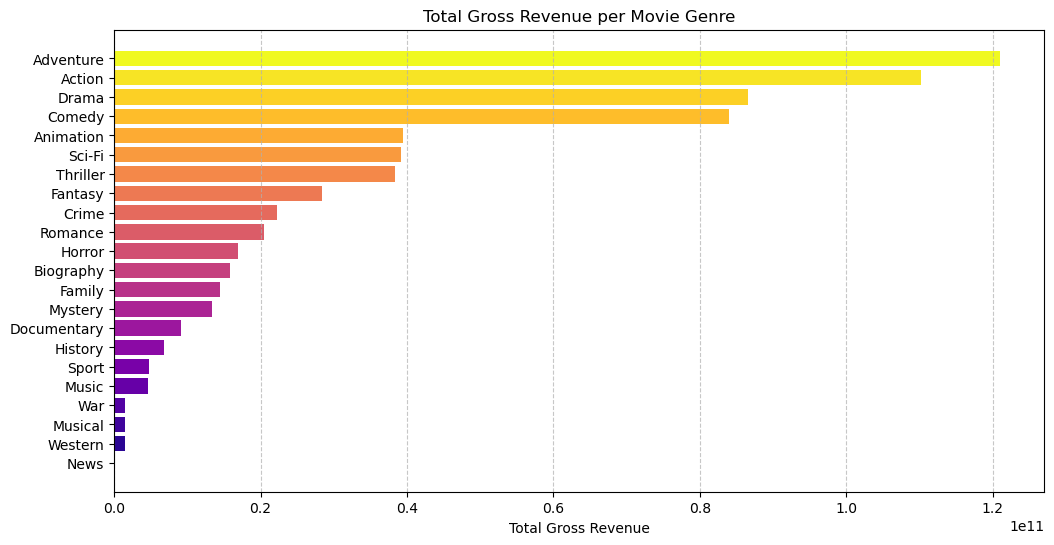

In [48]:
# Plotting the total gross revenue

sorted_revenue = genre_counts.groupby(genre_counts.index).sum().sort_values(by = 'total_gross')

#Create a color map for genres

unique_genres = sorted_revenue.index
colors = plt.cm.plasma(np.linspace(0, 1, len(unique_genres)))

plt.figure(figsize=(12, 6))

plt.barh(sorted_revenue.index, sorted_revenue['total_gross'], color=colors)

plt.xlabel('Total Gross Revenue')

plt.title('Total Gross Revenue per Movie Genre')

plt.grid(axis='x', linestyle='--', alpha=0.7)

#### Observation

There are 20 Genres

The most profitable genre is `Adventure`,followed by `Action`,`Drama`,`Comedy`,`Animation` respectively

The genre with the least revenue is `News` and `Western` and `Musicals`

The studio should prioritize creating films in the profitable  genres to increase their chances of commercial success.

#### Understanding Target Audience Preferences

#####  Genre Popularity

We  analyze how different genres perform in terms of total gross revenue

##### Corelation between rating and revenue

Check the average rating for each genre to see if higher-rated genres correlate with higher revenues

##### Audience Engagement

We analyze the number of votes to gauge audience engagement with different genres,knowing which genres are popular will allow the studio and 

distributors to tailor their marketing strategies,if a particular genre is trending, marketing campaigns can be focused on that genre to attract more

viewers. 

In [49]:
#Calculate total gross by genre,average rating by genre,
genre_revenue = exploded_df.groupby('genres').agg({'domestic_gross': 'sum', 'foreign_gross': 'sum', 'numvotes': 'sum'}).reset_index() 
average_rating = exploded_df.groupby('genres')['averagerating'].mean().reset_index() 
average_votes = exploded_df.groupby('genres')['numvotes'].mean().reset_index()

# Create a new column total_gross
genre_revenue['total_gross'] = genre_revenue['foreign_gross'] + genre_revenue['domestic_gross']

# Sort by total gross
genre_revenue = genre_revenue.sort_values(by='total_gross', ascending=False)

# Merge with revenue data
genre_analysis = pd.merge(genre_revenue, average_rating, on='genres', suffixes=('_revenue', '_rating'))

# Merge with genre analysis data
engagement_analysis = pd.merge(genre_analysis, average_votes, on='genres')



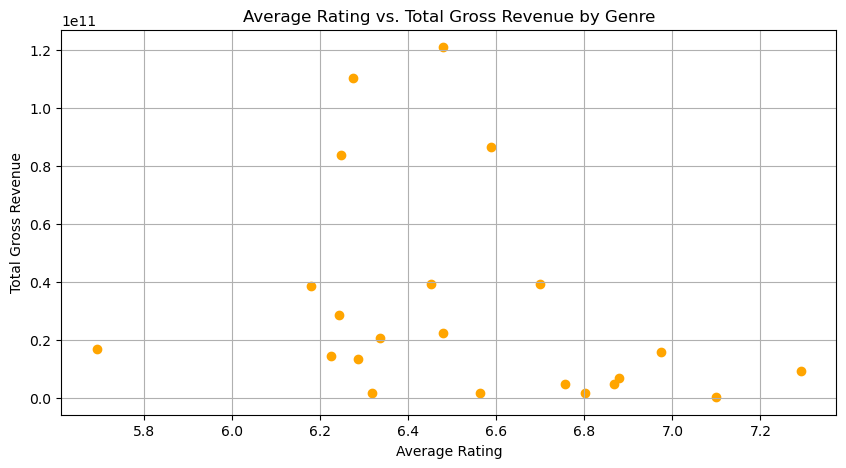

In [50]:
# Plotting to check any relationship between rating and revenue
plt.figure(figsize=(10, 5))

plt.scatter(engagement_analysis['averagerating'], engagement_analysis['total_gross'], color='orange')

plt.xlabel('Average Rating')

plt.ylabel('Total Gross Revenue')

plt.title('Average Rating vs. Total Gross Revenue by Genre')

plt.grid()
plt.show();

##### Observation

We note no visible correlation between the `Average Rating` and ` Gross Revenue`

In [53]:
# Pearson's correlation to confirm the above 
alpha = 0.05
pearson_coef, pearson_p_value = stats.pearsonr(engagement_analysis['averagerating'], engagement_analysis['total_gross'])
print(f"Pearson's correlation coefficient: {pearson_coef:.2f}")
print(f"Pearson's p-value: {pearson_p_value:.2f}")

Pearson's correlation coefficient: -0.29
Pearson's p-value: 0.19


**Summary**
- Weak Negative Correlation: The correlation coefficient of -0.29 indicates a weak negative relationship between average ratings and total gross 
  revenue, suggesting that higher-rated movies do not necessarily lead to higher revenue.
  
- Not Statistically Significant: The p-value of 0.19 indicates that this correlation is not statistically significant, meaning that the observed 
  relationship could be due to random chance rather than a true underlying relationship.




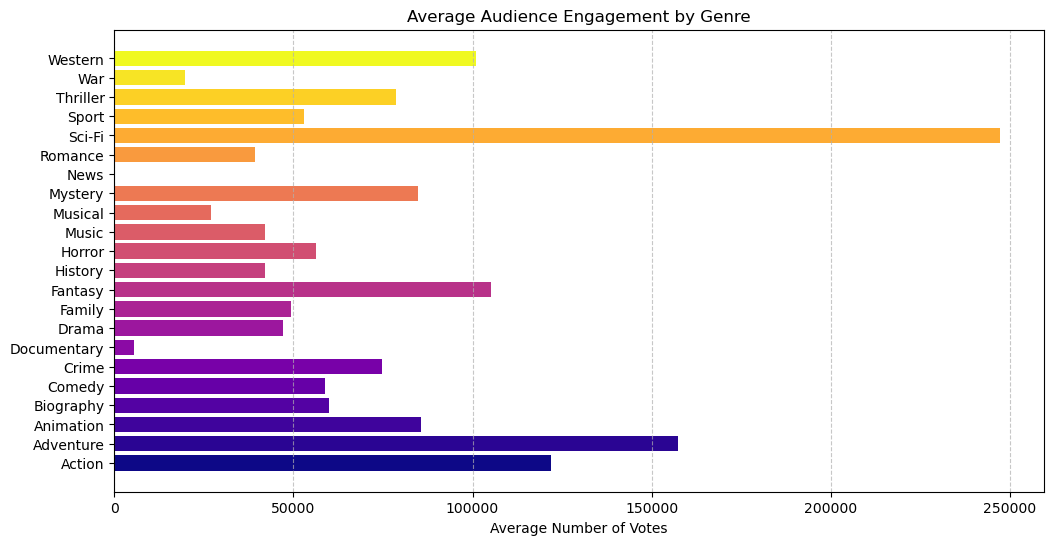

In [52]:
# Create the bar plot with plasma colors

colors = plt.cm.plasma(np.linspace(0, 1, len(average_votes['genres'])))

plt.figure(figsize=(12, 6))
plt.barh(average_votes['genres'], average_votes['numvotes'], color=colors)
plt.xlabel('Average Number of Votes')
plt.title('Average Audience Engagement by Genre')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show();

#### Observation

The Scify and Adventure genres are very popular this means that the studio should focus on these two when doing targeted marketing